### Problem Statement

In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

In [16]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

### Fetching url and the html

In [17]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [20]:
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="https://www.php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="https://www.php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="https://www.php.net/index.php">\n <link rel="shorturl" href="https://www.php.net/index">\n <link rel="alternate" href="https://www.php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" medi

In [21]:
print(soup.title)
print(soup.title.string)

<title>PHP: Hypertext Preprocessor</title>
PHP: Hypertext Preprocessor


## Extracting text

finding tokens

In [22]:
#text= soup.find('body').get_text(strip=True)     for body text
text = soup.get_text()
#tokens = [t for t in text.split()]   # words list 

# or by re

tokens = re.findall('\w+', text)

In [23]:
tokens[:15]   # printing words list

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language']

### converting tokens to lower case

In [24]:
words = []
for word in tokens:
  words.append(word.lower())
words[:5]

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

## Removing Stopwords

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goodluck\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [29]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
    if w not in stopWords:
        clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:24]

Total including stopwords: 3068
Length after stopwords: 2048
Total removed stopwords: 1020


['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures']

## words Frequency distribution

* Total count
* unique(vocab)
* lexical diversity
* most common
* max count word
* A list of all hapax legomena (words that only appear one time in the corpus).
* counts.freq(): The percentage of the corpus for the given token.
* counts.plot(): Plot the frequencies of the n most commonly occuring words.

In [30]:
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("Text has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Text has 342 types and 2048 tokens for a lexical diversity of 5.988


In [31]:
print(counts.most_common(10))

[('php', 169), ('release', 80), ('0', 69), ('7', 58), ('8', 45), ('found', 45), ('downloads', 44), ('source', 43), ('please', 40), ('version', 38)]


In [32]:
print(counts.max())

php


In [34]:
print(counts.hapaxes()[0:10])

['hypertext', 'preprocessor', 'documentation', 'get', 'involved', 'getting', 'started', 'simple', 'tutorial', 'syntax']


In [35]:
counts.freq('php'), counts.freq('hypertext')

(0.08251953125, 0.00048828125)

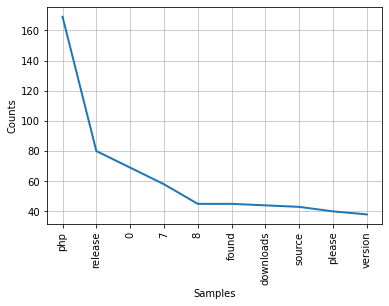

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
counts.plot(10, cumulative=False)

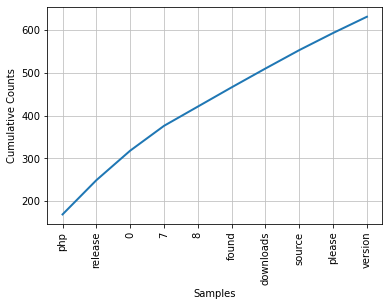

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [39]:
counts.plot(10, cumulative=True)